In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return ["underfat", "black"]
    if 18.5 <= bmi < 25:
        return ["healthy", "red"]
    if 25 <= bmi < 30:
        return ["overfat", "green"]
    if 30 <= bmi:
        return ["obese", "blue"]

In [3]:
plt.rcParams["figure.figsize"] = [15,10]

In [4]:
procrustes = np.load("procrustes.np.npy")
ids = np.load("procrustes_id.np.npy")

In [5]:
data = pd.read_excel("./planilla_colecta.xlsx")
data = data[data['id'].isin(ids)]
ids

array(['009', '147', '145', '149', '042', '070', '081', '092', '002',
       '071', '084', '086', '135', '117', '024', '103', '141', '130',
       '107', '058', '080', '055', '038', '125', '018', '091', '106',
       '153', '047', '041', '033', '097', '030', '089', '146', '094',
       '006', '142', '139', '035', '051', '087', '121', '028', '064',
       '079', '067', '049', '048', '046', '113', '100', '045', '143',
       '151', '127', '104', '061', '021', '059', '150', '148', '050',
       '138', '098', '090', '115', '054', '011', '073', '085', '053',
       '019', '069', '015', '118', '044', '105', '005', '026', '110',
       '154', '082', '124', '004', '078', '012', '016', '074', '114',
       '025', '001', '036', '052', '075', '034', '039', '112', '010',
       '123', '137', '120', '088', '128', '013', '101', '020', '017',
       '108', '063', '065', '122', '136', '056', '043'], dtype='<U3')

In [6]:
sexo = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["sexo"]])[0], ids))).reshape(115)
peso = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["peso"]])[0], ids))).reshape(115)
altura = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["promedio altura"]])[0] / 100 , ids))).reshape(115)
balance = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["Body fat range"]])[0] , ids)), dtype=np.str).reshape(115)

In [7]:
bmis = np.array(list(map( lambda pa: bmi_cal(pa[0] / (pa[1]*pa[1]))  ,zip(peso, altura))))

In [8]:
procrustes.shape

(115, 339000, 2)

Text(0.5,1,'id=043')

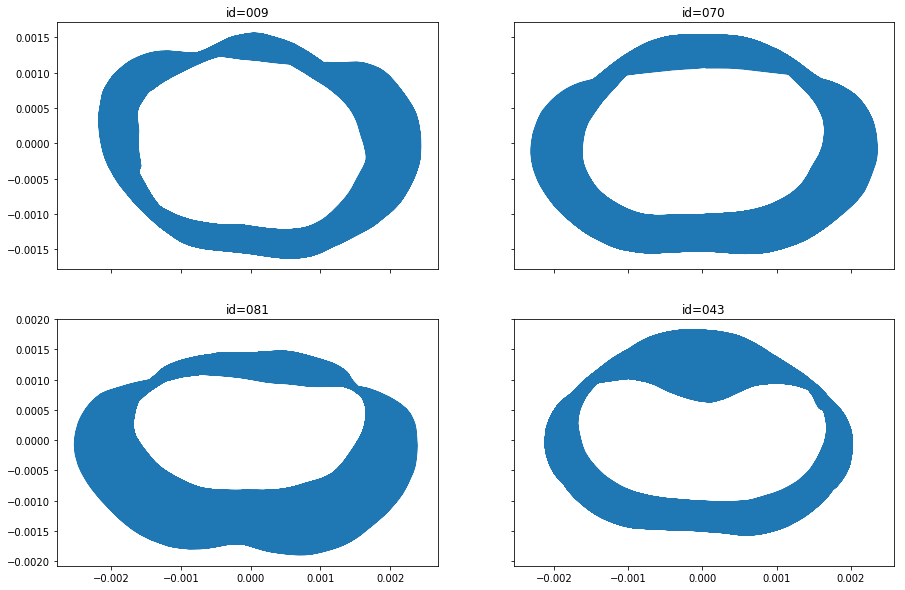

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(procrustes[0][:,0],procrustes[0][:,1],"-")
ax1.set_title("id="+ids[0])
ax2.plot(procrustes[5][:,0],procrustes[5][:,1],"-")
ax2.set_title("id="+ids[5])
ax3.plot(procrustes[6][:,0],procrustes[6][:,1],"-")
ax3.set_title("id="+ids[6])
ax4.plot(procrustes[-1][:,0],procrustes[-1][:,1],"-")
ax4.set_title("id="+ids[-1])

In [10]:
from sklearn import decomposition

In [11]:
sexo[sexo == "m "]="m" 

In [12]:
pr_f = procrustes[sexo=="f"]
id_f = ids[sexo=="f"]
bmis_f = bmis[sexo=="f"]

In [13]:
pr_m = procrustes[sexo=="m"]
id_m = ids[sexo=="m"]
bmis_m = bmis[sexo=="m"]

In [14]:
pr_f.shape

(90, 339000, 2)

In [15]:
pr_m.shape

(25, 339000, 2)

Con n_components = 50 el valor es: 0.8297601347663949 


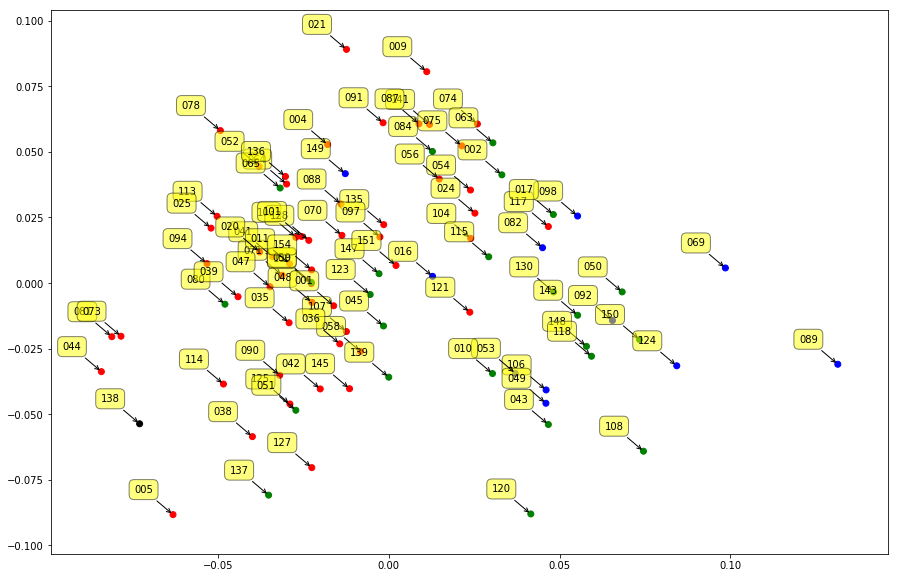

In [16]:
pcs = 50
pca = decomposition.PCA(n_components=pcs, svd_solver='randomized')
pca.fit(pr_f.reshape(90, -1))
print("Con n_components = {} el valor es: {} ".format(pcs, pca.explained_variance_ratio_.sum()))
x_out_f = pca.transform(pr_f.reshape(90, -1))
plt.scatter(x_out_f[:, 0], x_out_f[:, 1], marker="o", c=bmis_f[:,1])
for label, x, y in zip(id_f, x_out_f[:,0], x_out_f[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Con n_components = 15 el valor es: 0.8335577597275969 


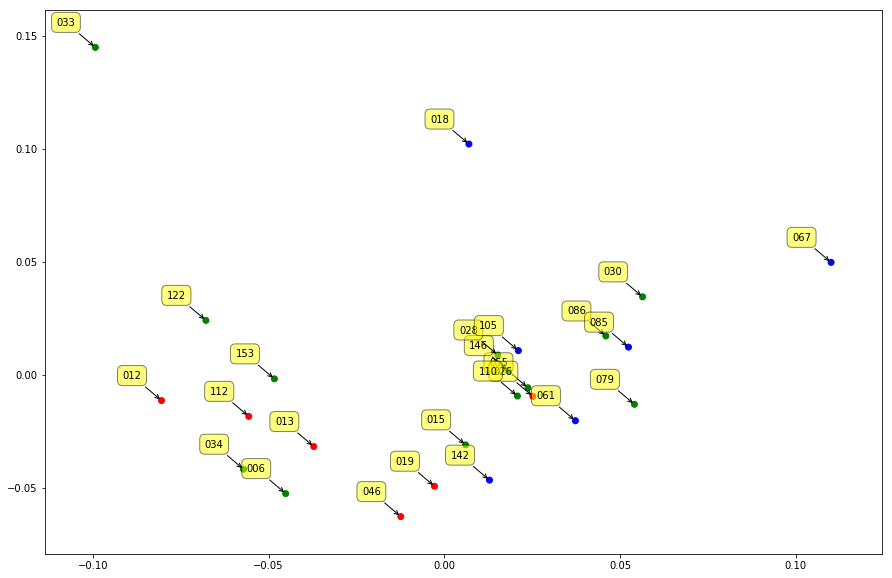

In [20]:
pcs = 15
pca = decomposition.PCA(n_components=pcs, svd_solver='randomized')
pca.fit(pr_m.reshape(25, -1))
print("Con n_components = {} el valor es: {} ".format(pcs, pca.explained_variance_ratio_.sum()))
x_out_m = pca.transform(pr_m.reshape(25, -1))
plt.scatter(x_out_m[:, 0], x_out_m[:, 1], marker="o", c=bmis_m[:,1])
for label, x, y in zip(id_m, x_out_m[:,0], x_out_m[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))